# Meander Maker

If you haven't ever used the `googlemaps` python package, there are a few small setup steps to take first. You'll need to install it by running the next cell. (If it runs something, but then looks like you have to choose `yes / no` then you'll need to run the commands in the terminal (without the `!` at the front.) Additionally, we will use `gmplot` to render the outputs and `polyline` to decode [Google's "Polyline"](https://developers.google.com/maps/documentation/utilities/polylineutility) hash. Finally, generate an API key to interface with Google's services. (There is a free tier, but if you use it a lot, they will start charging you for access.) Additionally, we will use `mapbox` from `Plotly Express` to get a different style of maps. This was mostly for development, but if you'd like to use that function, you'll need an api_key for that service as well.

In [ ]:
!pip install googlemaps
!pip install gmplot
!pip install polyline
!pip install haversine

In [ ]:
!conda install -c conda-forge hdbscan

As mentioned above, if you would like to tinker around with the code, you'll need your own API key for Google Maps and potentially Mapbox. You can register one for Google from this address: [https://developers.google.com/places/web-service/get-api-key](https://developers.google.com/places/web-service/get-api-key) and Mapbox can be found here: [https://account.mapbox.com/access-tokens/](https://account.mapbox.com/access-tokens/). Once you have one, create a file in the directory containing this notebook called `.secret.key` and simply paste in this dictionary (edited with your specific api_key pasted in). The file shouldn't have any line breaks but your api_key _does_ need to be in quotes within the dictionary. Save the file, exit, and you should be good to go.

```{'googlemaps' : "YOUR_GOOGLE_API_KEY_HERE", 'mapbox' : "YOUR_MAPBOX_API_KEY_HERE"}```

In [1]:
from meander_maker import goplaces as gp

%load_ext autoreload
%autoreload 2

/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Let's decide which topic to explore:

In [32]:
loc, topic = gp.populate_inputs()

Where would you like to start? Eastlake neighborhood, seattle
What theme would you like to explore today? shoe stores


{'C': 0.6548, 'B': 0.5929, 'D': 0.1002, 'A': 0.6431}

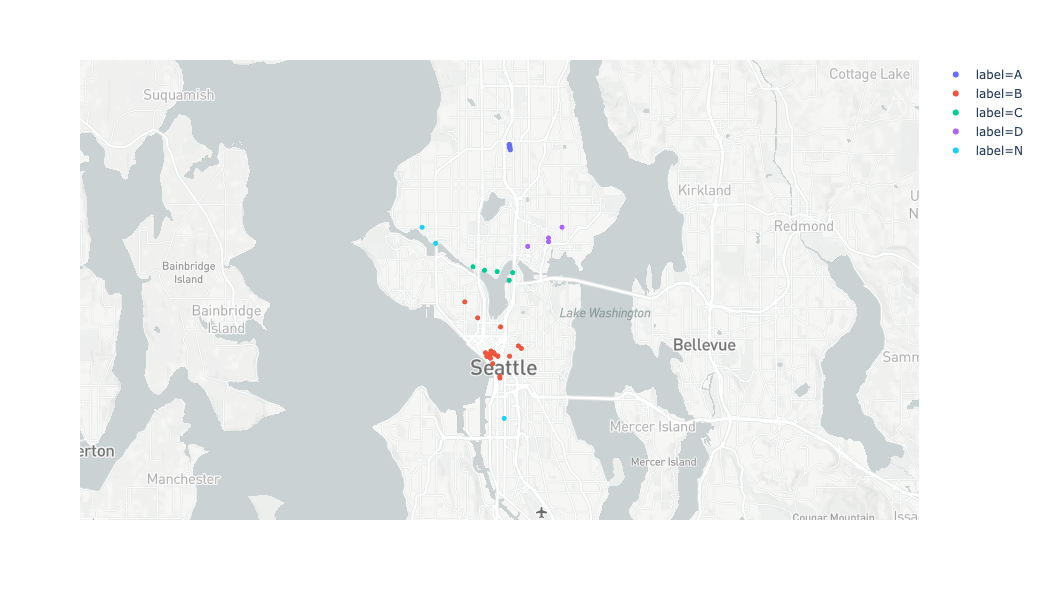

,lat,lng,name,rating,user_ratings_total,label,dist_to_loc
28,47.647845,-122.323745,Grey City,0.0,0,C,706.599515
29,47.648303,-122.334423,Linea Photosharing LLC,4.0,1,C,939.069717
30,47.648949,-122.343139,Sole Perfection Shoes,4.0,13,C,1481.293262
31,47.650559,-122.351061,Burnt Sugar,2.8,13,C,2084.458285
32,47.644294,-122.326213,Cheater Five Inc,0.0,0,C,281.861306


,lat,lng,name,rating,user_ratings_total,label,dist_to_loc
7,47.626912,-122.347831,LUNA Sandals,4.9,27,B,2299.046002
8,47.609272,-122.334091,Allen Edmonds,4.8,16,B,3657.766357
9,47.609144,-122.333958,Mephisto Shoes,4.3,10,B,3670.236578
10,47.609139,-122.339633,Sneaker City,3.7,41,B,3759.329273
11,47.605710,-122.337510,A Mano,4.7,7,B,4093.454155
12,47.608234,-122.339093,Romax Shoes,5.0,5,B,3846.349834
13,47.599801,-122.332607,Clementines,4.7,14,B,4688.722974
14,47.599105,-122.332516,The Washington Shoe Mfg. Co.,0.0,0,B,4765.098286
15,47.609056,-122.341548,Mobeta Shoes,3.1,7,B,3808.235808
16,47.610331,-122.339407,John Fluevog Shoes,4.8,67,B,3626.943235


,lat,lng,name,rating,user_ratings_total,label,dist_to_loc
33,47.659979,-122.313471,Woolly Mammoth,4.8,38,D,2247.705776
34,47.662118,-122.299164,Sole Food,4.6,18,D,3051.285591
35,47.668869,-122.289895,McManus Shoes & Footcare Center,0.0,0,D,4073.643511
36,47.663877,-122.299190,The Frye Company,4.6,30,D,3197.763608


,lat,lng,name,rating,user_ratings_total,label,dist_to_loc
0,47.706989,-122.326136,SKECHERS Retail,4.1,35,A,7252.613424
1,47.706989,-122.326136,Famous Footwear,3.9,42,A,7252.613424
2,47.705979,-122.325683,Champs Sports,2.7,17,A,7140.434942
3,47.705894,-122.326099,The Walking Company,3.9,15,A,7130.821912
4,47.705244,-122.325631,Journeys,3.2,6,A,7058.832827
5,47.704605,-122.325441,Finish Line,3.2,19,A,6987.893431
6,47.706989,-122.326136,Payless ShoeSource,3.6,32,A,7252.613424


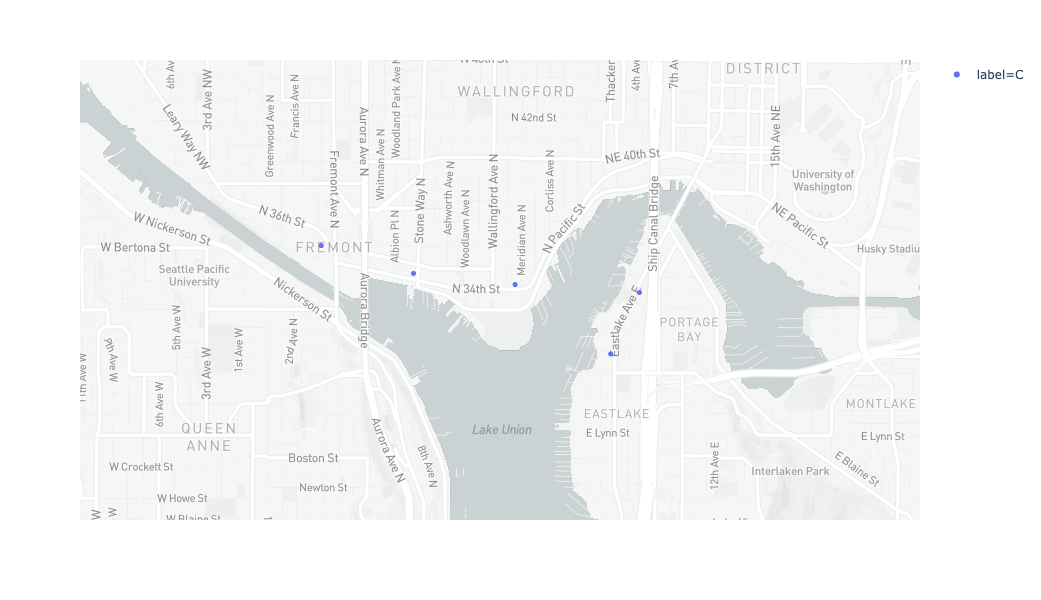

In [35]:
df = gp.build_df(loc, topic)
best_cluster = gp.choose_cluster(df, loc, verbose=True)
gp.mapbox(best_cluster)

In [34]:
wlk = gp.meander(best_cluster, loc, mode='walking', verbose=True)
gp.html_builder(loc, wlk, tab=True)

+3816 m --and-- +49.55 min
+773 m --and-- +9.47 min
+688 m --and-- +9.25 min
+3024 m --and-- +38.92 min
total dist: 8301 m 
est time: 107.2 min


.  
---------TESTING---------TESTING---------TESTING---------TESTING---------TESTING---------  
.  

In [40]:
df['lat'].std()

0.03796986650867014

In [41]:
df['lng'].std()

0.017396317203215564